In [11]:
import pandas as pd

# 1. 데이터 로드
data = pd.read_csv('./../../Fed1_dataset/Interest_rate_prediction.csv')
df = data.copy()

# 데이터 확인
df.head()


,DATE,DFEDTARU,DFEDTARL,IR_FORCAST,GDPGR,UNRATE,PCEPI,TNX,USD,KR_IR,ECB_IR,BB_text,BB_neg,BB_neu,BB_pos,BB_sentiment,DATE_YM
0,2008-12-01,0.25,0.0,0.50,-8.5,7.3,88.098,2.244,1259.5,3.0,2.50,Prepared at the Federal Reserve Bank of Minnea...,0.080,0.839,0.082,0.9133,2008-12
1,2009-01-01,0.25,0.0,0.25,-4.5,7.8,88.108,2.844,1379.5,2.5,2.00,Prepared at the Federal Reserve Bank of St. Lo...,0.061,0.865,0.074,0.9952,2009-01
2,2009-02-01,0.25,0.0,0.25,-4.5,8.3,88.266,3.041,1534.0,2.0,2.00,Prepared at the Federal Reserve Bank of St. Lo...,0.061,0.865,0.074,0.9952,2009-02
3,2009-03-01,0.25,0.0,0.25,-4.5,8.7,88.169,2.685,1383.5,2.0,1.50,Prepared at the Federal Reserve Bank of San Fr...,0.083,0.839,0.078,0.5459,2009-03
4,2009-04-01,0.25,0.0,0.25,-0.7,9.0,88.295,3.124,1282.0,2.0,1.25,Prepared at the Federal Reserve Bank of Dallas...,0.092,0.826,0.082,-0.6999,2009-04


In [2]:
# 2. 숫자형 데이터만 선택
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# 숫자형 데이터 확인
numeric_df.head()


,DFEDTARU,DFEDTARL,IR_FORCAST,GDPGR,UNRATE,PCEPI,TNX,USD,KR_IR,ECB_IR,BB_neg,BB_neu,BB_pos,BB_sentiment
0,0.25,0.0,0.50,-8.5,7.3,88.098,2.244,1259.5,3.0,2.50,0.080,0.839,0.082,0.9133
1,0.25,0.0,0.25,-4.5,7.8,88.108,2.844,1379.5,2.5,2.00,0.061,0.865,0.074,0.9952
2,0.25,0.0,0.25,-4.5,8.3,88.266,3.041,1534.0,2.0,2.00,0.061,0.865,0.074,0.9952
3,0.25,0.0,0.25,-4.5,8.7,88.169,2.685,1383.5,2.0,1.50,0.083,0.839,0.078,0.5459
4,0.25,0.0,0.25,-0.7,9.0,88.295,3.124,1282.0,2.0,1.25,0.092,0.826,0.082,-0.6999


In [3]:
# 3. 독립 변수(X)와 종속 변수(y) 설정
# DFEDTARU를 종속 변수로 설정하고, 나머지 숫자형 데이터를 독립 변수로 설정
X = numeric_df.drop(columns=['DFEDTARU'])
y = numeric_df['DFEDTARU']

# 독립 변수와 종속 변수 확인
X.head(), y.head()


(   DFEDTARL  IR_FORCAST  GDPGR  UNRATE   PCEPI    TNX     USD  KR_IR  ECB_IR  \
 0       0.0        0.50   -8.5     7.3  88.098  2.244  1259.5    3.0    2.50   
 1       0.0        0.25   -4.5     7.8  88.108  2.844  1379.5    2.5    2.00   
 2       0.0        0.25   -4.5     8.3  88.266  3.041  1534.0    2.0    2.00   
 3       0.0        0.25   -4.5     8.7  88.169  2.685  1383.5    2.0    1.50   
 4       0.0        0.25   -0.7     9.0  88.295  3.124  1282.0    2.0    1.25   
 
    BB_neg  BB_neu  BB_pos  BB_sentiment  
 0   0.080   0.839   0.082        0.9133  
 1   0.061   0.865   0.074        0.9952  
 2   0.061   0.865   0.074        0.9952  
 3   0.083   0.839   0.078        0.5459  
 4   0.092   0.826   0.082       -0.6999  ,
 0    0.25
 1    0.25
 2    0.25
 3    0.25
 4    0.25
 Name: DFEDTARU, dtype: float64)

In [4]:
from sklearn.model_selection import train_test_split

# 4. 데이터 분할 (학습용 80%, 테스트용 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 분할 결과 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((150, 13), (38, 13), (150,), (38,))

In [5]:
from sklearn.linear_model import LinearRegression

# 5. 선형 회귀 모델 선택 및 학습
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

# 6. 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 모델 평가 (MSE 및 R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 1.360856016819986e-28
R² Score: 1.0


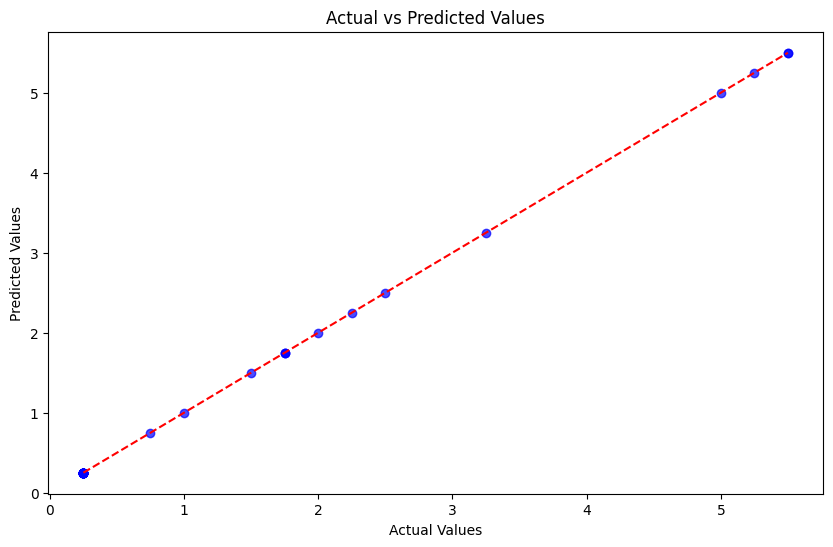

In [9]:
#산점도
import matplotlib.pyplot as plt

# 실제값 vs 예측값 비교 (산점도)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
# 점들이 대각선 근처에 몰려있다면 모델의 성능이 매우 좋음 
# 점들이 대각선에서 벗어나있다면 모델의 성능이 떨어지거나 개선이 필요

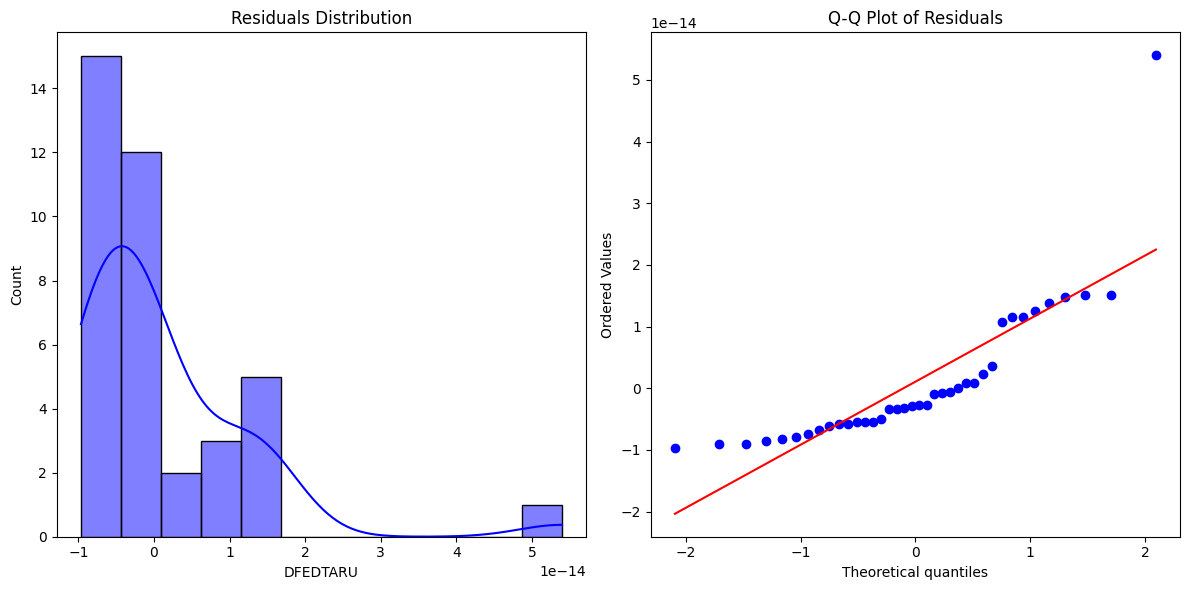

In [8]:
# 잔차 분석
import seaborn as sns
from scipy import stats

# 잔차 계산
residuals = y_test - y_pred

# 히스토그램과 Q-Q 플롯 시각화
plt.figure(figsize=(12, 6))

# 잔차 히스토그램
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, color='blue')
plt.title('Residuals Distribution')

# 잔차 Q-Q 플롯
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()


In [ ]:
# Residuals Distribution(잔차 히스토그램)

# 목적: 잔차의 분포를 시각적으로 확인하여 모델의 예측이 특정한 패턴이나 편향을 가지는지 확인합니다.

# 1. 잔차가 정규 분포를 따른다면, 모델이 전반적으로 좋은 예측을 하고 있음을 의미합니다.
# 2. 히스토그램이 대칭적이고 중심이 0에 가까우면, 예측 오차가 평균적으로 0에 가깝고,
#    특정 방향으로 편향되지 않았음을 나타냅니다.
# 3. 만약 잔차가 특정한 방향으로 치우쳐 있거나, 정규 분포에서 크게 벗어나면,
#    이는 모델이 데이터의 특정 부분을 잘못 예측하고 있음을 시사할 수 있습니다.

In [ ]:
# Q-Q Plot of Residuals(잔차 Q-Q 플롯)

# 목적: 잔차가 정규 분포를 따르는지 확인합니다. 

# 1. Q-Q 플롯에서 점들이 대각선에 가깝게 배열되어 있다면, 잔차가 정규 분포를 따르고 있음을 의미합니다. 이는 모델의 예측이 전반적으로 안정적임을 시사합니다.
# 2. 점들이 대각선에서 크게 벗어나 있다면, 잔차가 정규 분포를 따르지 않음을 의미하며, 이는 모델의 예측에 편향이 있을 수 있음을 나타냅니다.

In [ ]:
# 파일 저장

df.to_csv('./../../result1/result_model_202408.csv', index=False)